In [111]:
import random
import math
import copy
import os
import matplotlib.pyplot as plt

In [112]:
# [x] fitness function
# [x] population initialization
# [x] crossover
# [x] mutation

In [113]:
def f(x, y):
    return (x) ** 2 + (y) ** 2

In [114]:
def random_between_m100_and_100(): 
    return (random.random() - 0.5) * 2 * 100

In [115]:
def random_between_m5_and_5(): 
    return (random.random() - 0.5) * 2

In [116]:
class Chromosome():
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y

    def __repr__(self):
        return f"(x={self.x:.2f}, y={self.y:2f})"

In [117]:
def fitness(chromosome):
    return - f(chromosome.x, chromosome.y)

In [118]:
def initialize_population(n):
    ret = []
    for i in range(n):
        _x = random_between_m100_and_100()
        _y = random_between_m100_and_100()
        chromosome = Chromosome(_x, _y)
        ret.append(chromosome)
    return ret

In [119]:
def crossover(chromosome_1, chromosome_2):
    return Chromosome(
        (chromosome_1.x + chromosome_2.x)/2,
        (chromosome_1.y + chromosome_2.y)/2,
     )

In [120]:
def mutate(chromosome):
    return Chromosome(
        chromosome.x + random_between_m5_and_5(),
        chromosome.y + random_between_m5_and_5(),
    )

In [121]:
POPULATION_SIZE = 1000
HOW_MANY_CHROMOSOMES_TO_SELECT = 500
HOW_MANY_TO_GENERATE_BY_CROSSOVER = POPULATION_SIZE - HOW_MANY_CHROMOSOMES_TO_SELECT
MUTATION_PROBABILITY = 0.05
population = initialize_population(POPULATION_SIZE)

In [122]:
def genetic_algorithm_single_iteration(_population):
    
    # evaluate chromosomes
    fitness_of_chromosomes = []
    for chromosome in _population:
        fitness_of_chromosomes.append(fitness(chromosome))

    # select good chromosomes
    cutoff_fitness = sorted(fitness_of_chromosomes, reverse=True)[HOW_MANY_CHROMOSOMES_TO_SELECT]
    selected_chromosomes = []
    for chromosome, _fitness in zip(_population, fitness_of_chromosomes):
        if (_fitness >= cutoff_fitness):
            selected_chromosomes.append(chromosome)

    # crossover
    offsprings = []
    for j in range(HOW_MANY_TO_GENERATE_BY_CROSSOVER):
        sampled_chromosomes = random.sample(_population, 2)
        offspring = crossover(sampled_chromosomes[0], sampled_chromosomes[1])
        offsprings.append(offspring)
    
    _population = selected_chromosomes + offsprings

    # mutation
    final_population = []
    for chromosome in _population:
        if random.random() < MUTATION_PROBABILITY:
            final_population.append(mutate(chromosome))
        else:
            final_population.append(chromosome)
    
    _population = final_population
    return _population

In [109]:
for i in range(100):
    population = genetic_algorithm_single_iteration(copy.deepcopy(population))

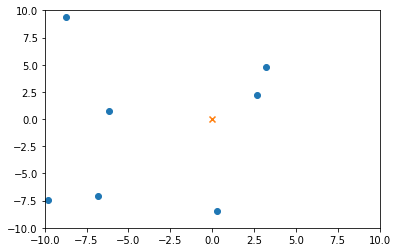

In [123]:
x = [c.x for c in population]
y = [c.y for c in population]
plt.scatter(x, y)
plt.scatter(0, 0, marker="x")
#plt.scatter(5, 2, marker="x")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
population = genetic_algorithm_single_iteration(copy.deepcopy(population))

In [586]:
#population

[(x=4.42, y=-28.432435),
 (x=4.87, y=-29.450104),
 (x=7.93, y=-31.858031),
 (x=4.91, y=-30.174227),
 (x=6.81, y=-27.386437),
 (x=4.60, y=-24.884120),
 (x=5.54, y=-32.542489),
 (x=5.86, y=-31.541827),
 (x=5.51, y=-31.158410),
 (x=5.59, y=-31.969878)]

In [204]:
#for i, j in zip(range(10), range(10, 20)):
 #   print(i, j)

0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
